In [1]:
import pandas as pd
import numpy as np
import fpw
import matplotlib.pyplot as plt

def freq_grid(t, fmin=None, fmax=None, oversample=3):
    trange = max(t) - min(t)
    texp = np.nanmin(np.diff(np.sort(t)))
    fres = 1./trange/oversample
    if fmax is None:
        fmax = 0.5 / texp
    if fmin is None:
        fmin = fres
    fgrid = np.arange(fmin,fmax,fres)
    return fgrid

In [2]:
#Pull data
df = pd.read_csv("/data/sams_datasets/tydy.csv", header=None)
t = df[0].values
y = df[1].values
dy = df[2].values

#Pull the fgrid
df = pd.read_csv("/data/sams_datasets/fgrid.csv", header=None)
fgrid = df[0].values

In [3]:
%%time
#Run fpw on this data
pgram = fpw.run_fpw(t, y, dy, fgrid, 10)

CPU times: user 13.1 s, sys: 59.5 ms, total: 13.1 s
Wall time: 13 s


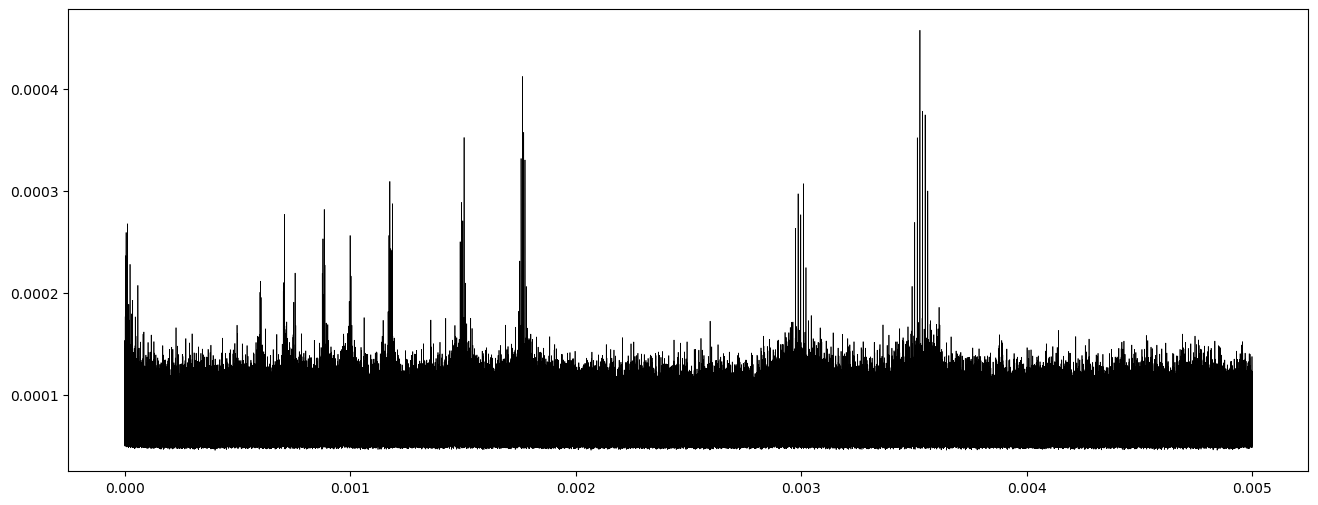

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(fgrid, pgram, color='black', lw=0.5)
plt.show()